In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df = pd.read_excel('Online Retail.xlsx')

numerical_cols = ['Quantity', 'UnitPrice']
X = df[numerical_cols].values

# a. Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())


Shape: (541909, 8)

First 5 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Data types:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetim

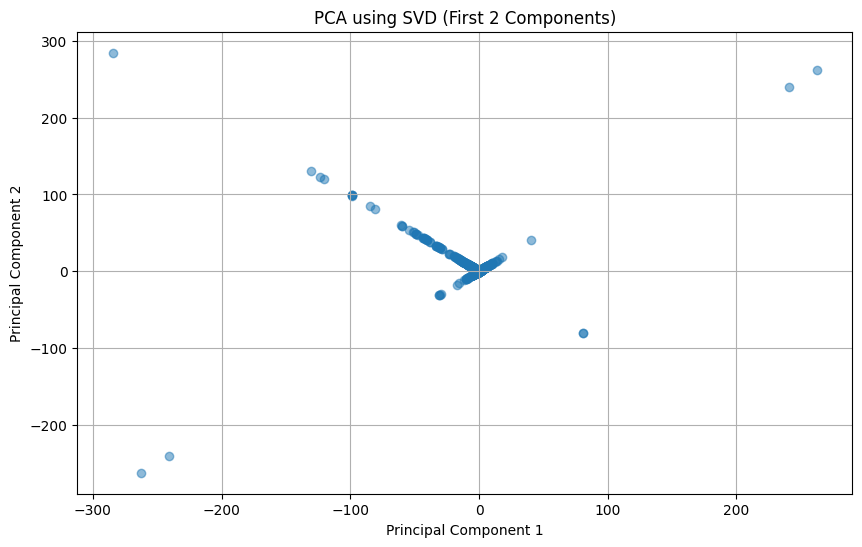

In [ ]:
# b. PCA using SVD
# i. Center the data (already done by StandardScaler)
# ii. Apply SVD
U, s, Vt = np.linalg.svd(X_std, full_matrices=False)

# iii. Select top 2 principal components
pc_svd = Vt[:2].T

# iv. Project data onto components
X_proj_svd = X_std @ pc_svd

# v. Plot transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X_proj_svd[:, 0], X_proj_svd[:, 1], alpha=0.5)
plt.title('PCA using SVD (First 2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [ ]:
# c. PCA using covariance matrix and eigen decomposition
cov_mat = np.cov(X_std.T)

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
idx = eigen_vals.argsort()[::-1]
eigen_vecs = eigen_vecs[:, idx]
pc_eigen = eigen_vecs[:, :2]

X_proj_eigen = X_std @ pc_eigen

print("SVD components:\n", pc_svd)
print("\nEigen decomposition components:\n", pc_eigen)


SVD components:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

Eigen decomposition components:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


# d. Why SVD is preferred?

SVD is generally preferred because:
1. It's numerically more stable
2. Doesn't require explicit computation of covariance matrix
3. Works better with sparse matrices
4. More computationally efficient for wide/narrow matrices

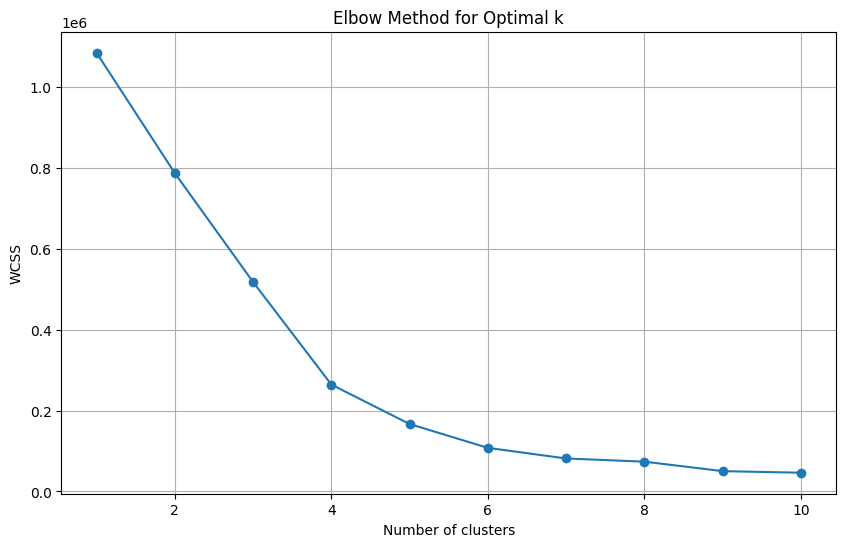

In [ ]:
# e. K-Means on PCA-reduced data (using SVD results)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_proj_svd)
    wcss.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


In [ ]:
# f. K-Means with optimal k (assuming 3 based on elbow)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_proj_svd)

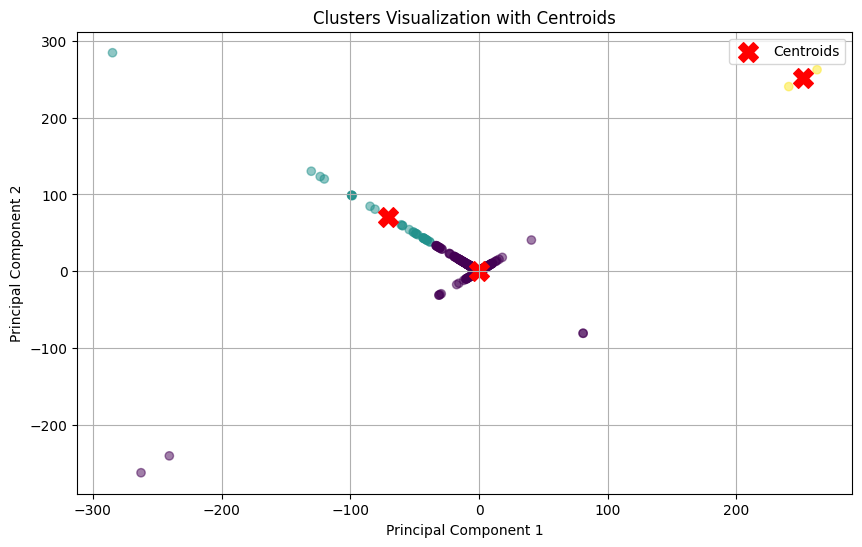

In [ ]:
# g. Scatter plot with clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_proj_svd[:, 0], X_proj_svd[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title('Clusters Visualization with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()